In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from copy import copy, deepcopy
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
pd.options.display.max_columns = 100

### 1. Read Data from Csv Files:

In [3]:
traindf = pd.read_csv('training.csv')
testdf = pd.read_csv('testingCandidate.csv')

### 2. Data Understanding:
    
Let us look at the top few rows to understand the variables and the nature of data

In [4]:
traindf.shape,testdf.shape

((8238, 24), (32950, 22))

In [8]:
traindf.head(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,49.0,self-employed,married,basic.9y,no,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,999.0,0,no,NaN,1
1,NaN,housemaid,married,professional.course,no,no,no,cellular,jul,tue,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,NaN,2
2,45.0,management,divorced,university.degree,no,no,no,cellular,apr,tue,2,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,999.0,0,no,NaN,3


In [9]:
testdf.head(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,38.0,self-employed,married,high.school,no,yes,no,telephone,jul,tue,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,1
1,40.0,self-employed,married,NaN,no,no,no,cellular,apr,thu,10,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,999.0,0,2
2,NaN,unemployed,single,university.degree,no,yes,no,cellular,aug,thu,2,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,999.0,0,3


Now let us look at the distribution of data in each of these columns

In [11]:
traindf.describe()

/Users/MaxTan/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,928.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,172.112069,4119.500000
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,128.999186,2378.250092
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,-276.000000,1.000000
25%,NaN,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,NaN,2060.250000
50%,NaN,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,NaN,4119.500000
75%,NaN,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,NaN,6178.750000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,515.000000,8238.000000


In [12]:
testdf.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
count,24908.000000,32950.000000,32950.000000,32950.00000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.035852,2.576571,962.865190,0.17044,0.088258,93.576836,-40.483772,3.629882,5167.400920,962.655163,0.341730,16475.500000
std,10.425448,2.784839,185.953677,0.48993,1.572019,0.578857,4.622585,1.732277,72.128548,187.033081,1.246076,9511.990021
min,17.000000,1.000000,0.000000,0.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,1.000000
25%,NaN,1.000000,999.000000,0.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,999.000000,0.000000,8238.250000
50%,NaN,2.000000,999.000000,0.00000,1.100000,93.798000,-41.800000,4.857000,5191.000000,999.000000,0.000000,16475.500000
75%,NaN,3.000000,999.000000,0.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,24712.750000
max,98.000000,56.000000,999.000000,7.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,28.000000,32950.000000


It seems NaN values are present in only two (custAge and profit) in training data and in only one (custAge) in test data. But it's only for quantitative features.
So let us count the number of missing values in all columns.

In [23]:
labels = []
values = []
for col in traindf.columns:
    labels.append(col)
    values.append(traindf[col].isnull().sum())
    print(col, values[-1])

('custAge', 2014)
('profession', 0)
('marital', 0)
('schooling', 2406)
('default', 0)
('housing', 0)
('loan', 0)
('contact', 0)
('month', 0)
('day_of_week', 787)
('campaign', 0)
('pdays', 0)
('previous', 0)
('poutcome', 0)
('emp.var.rate', 0)
('cons.price.idx', 0)
('cons.conf.idx', 0)
('euribor3m', 0)
('nr.employed', 0)
('pmonths', 0)
('pastEmail', 0)
('responded', 0)
('profit', 7310)
('id', 0)


Let's visualize the results to see the distribtion of missing values.

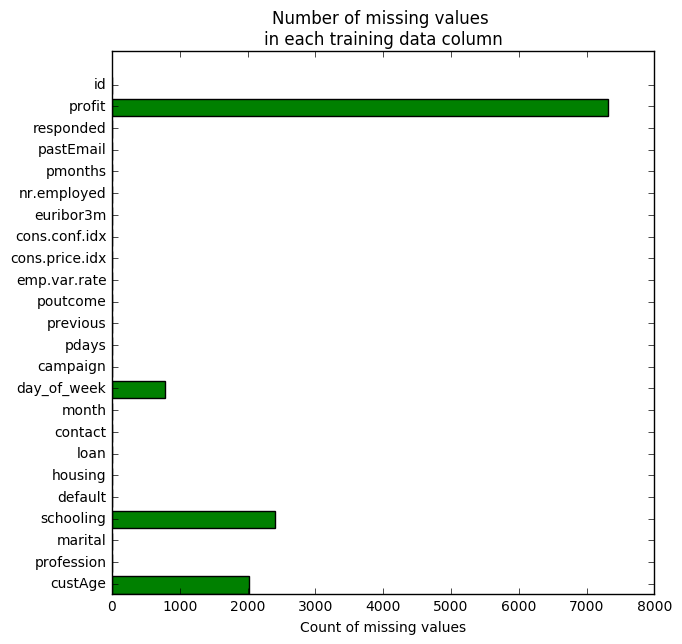

In [25]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(7,7))
rects = ax.barh(ind, np.array(values), color='g')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values \nin each training data column")
#autolabel(rects)
plt.show()

Do the same analysis and visualization to test data.

In [15]:
labels = []
values = []
for col in testdf.columns:
    labels.append(col)
    values.append(testdf[col].isnull().sum())
    print(col, values[-1])

('custAge', 8042)
('profession', 0)
('marital', 0)
('schooling', 9770)
('default', 0)
('housing', 0)
('loan', 0)
('contact', 0)
('month', 0)
('day_of_week', 3328)
('campaign', 0)
('pdays', 0)
('previous', 0)
('poutcome', 0)
('emp.var.rate', 0)
('cons.price.idx', 0)
('cons.conf.idx', 0)
('euribor3m', 0)
('nr.employed', 0)
('pmonths', 0)
('pastEmail', 0)
('id', 0)


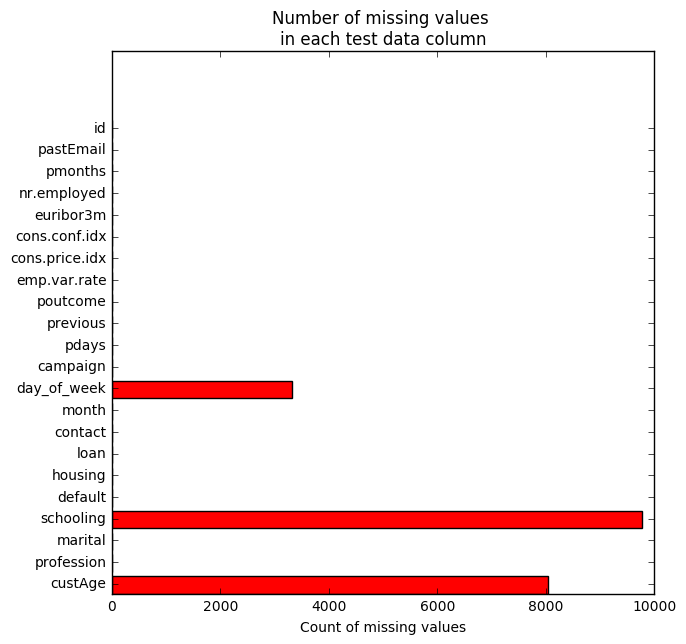

In [22]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(7,7))
rects = ax.barh(ind, np.array(values), color='r')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values \nin each test data column")
#autolabel(rects)
plt.show()

In this case, 4 features 'custAge', 'schooling', 'day_of_week' and 'profit' have NaN for training data and test data. And we can see their distribution according to plots above.

Next, let's take a look at all responses' distribution in the training data.

In [41]:
traindf.columns

Index([u'custAge', u'profession', u'marital', u'schooling', u'default',
       u'housing', u'loan', u'contact', u'month', u'day_of_week', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'pmonths',
       u'pastEmail', u'responded', u'profit', u'id'],
      dtype='object')

There are 24 columns in total in training dataset.
We first see distributions of numeric columns

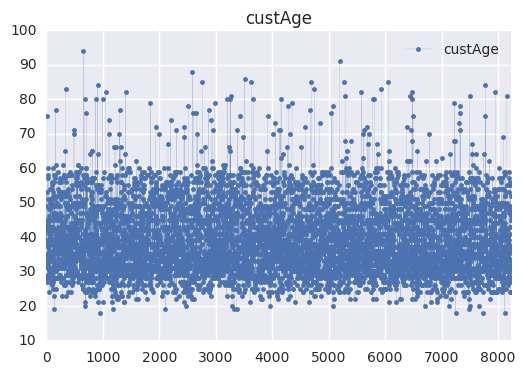

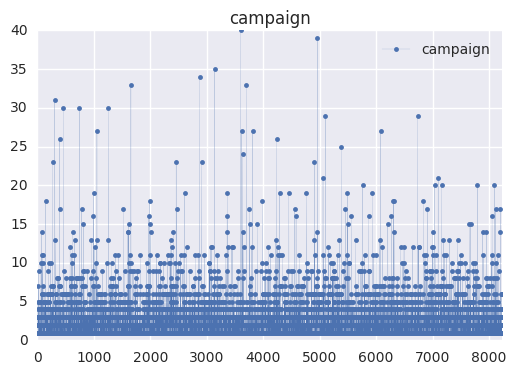

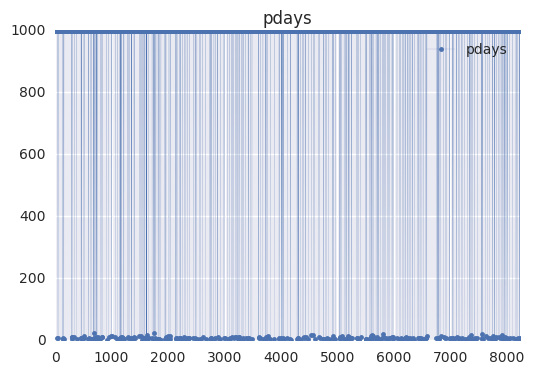

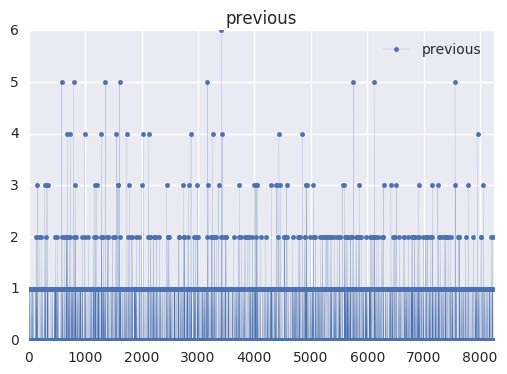

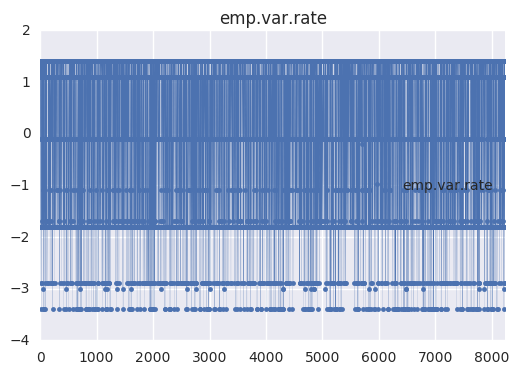

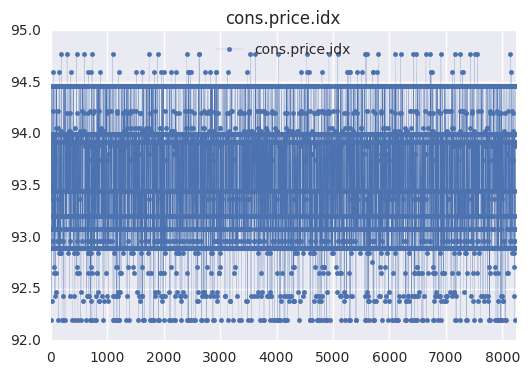

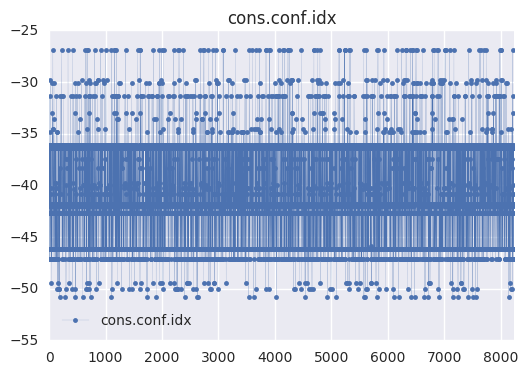

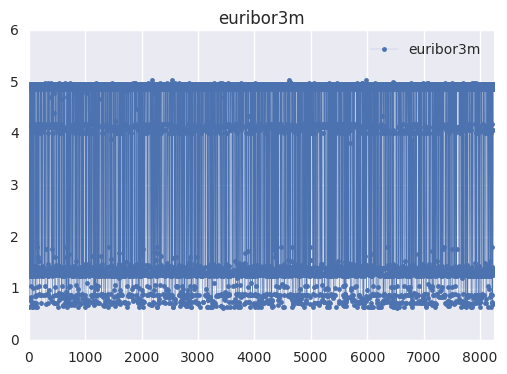

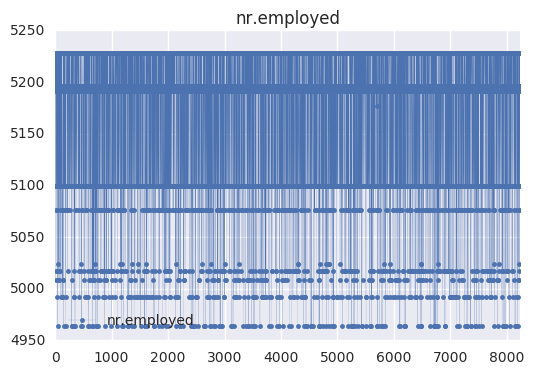

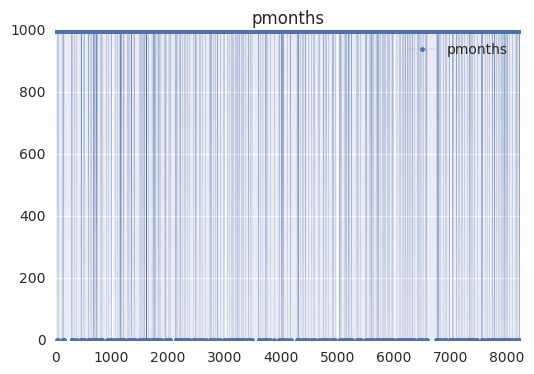

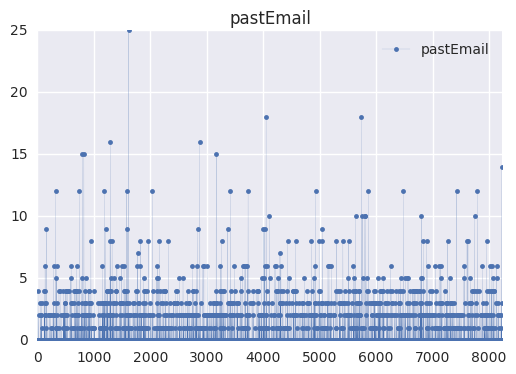

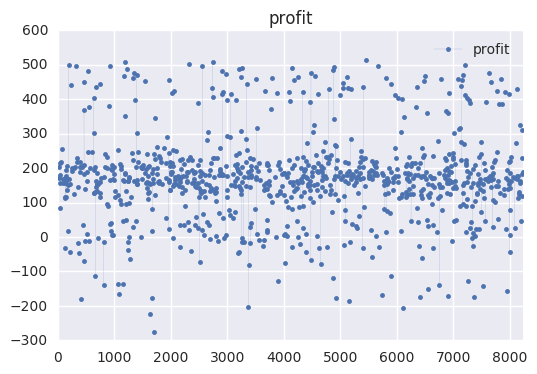

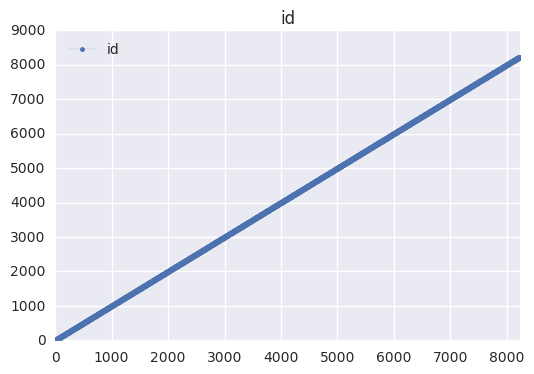

In [93]:
num_feat = []
cat_feat = []
for col in traindf.columns:
    try:
        traindf[[col]].iloc[:,:].plot(marker='.',title =col, linewidth=0.1)
        num_feat.append(col)
    except TypeError:
        cat_feat.append(col)
    

In [62]:
print len(cat_feat),len(num_feat)

11 13


In this case, we found out there are 11 categorical columns and 13 numeric columns.
Then, we take a look at distributions of those categorical columns.

In [94]:
for col in cat_feat:
    print traindf[col].value_counts()
    print '***\n'

admin.           2102
blue-collar      1847
technician       1351
services          792
management        583
retired           337
entrepreneur      314
self-employed     279
housemaid         213
unemployed        190
student           159
unknown            71
Name: profession, dtype: int64
***

married     4957
single      2339
divorced     932
unknown       10
Name: marital, dtype: int64
***

university.degree      1731
high.school            1340
basic.9y                863
professional.course     738
basic.4y                586
basic.6y                313
unknown                 260
illiterate                1
Name: schooling, dtype: int64
***

no         6619
unknown    1618
yes           1
Name: default, dtype: int64
***

yes        4300
no         3754
unknown     184
Name: housing, dtype: int64
***

no         6775
yes        1279
unknown     184
Name: loan, dtype: int64
***

cellular     5243
telephone    2995
Name: contact, dtype: int64
***

may    2814
jul    1352
aug    

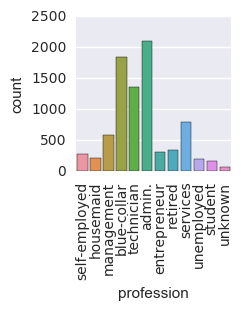

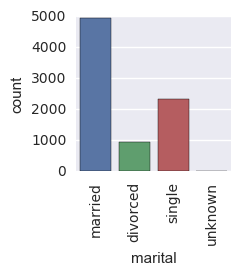

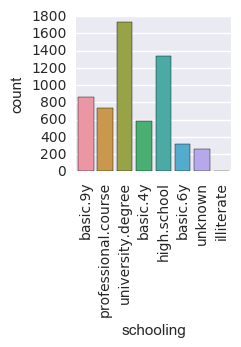

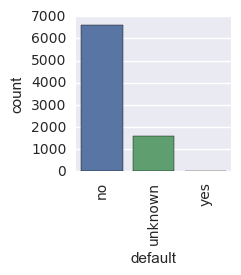

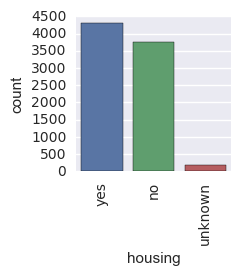

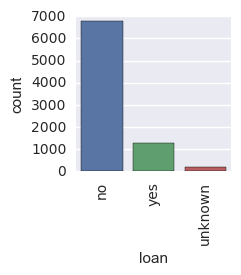

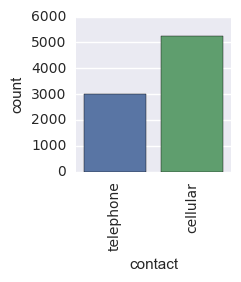

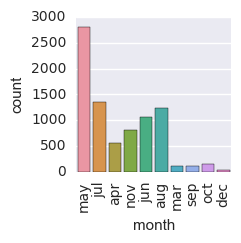

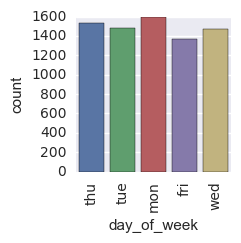

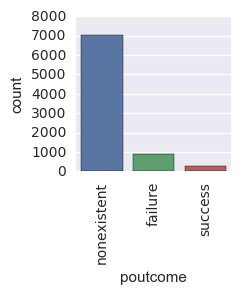

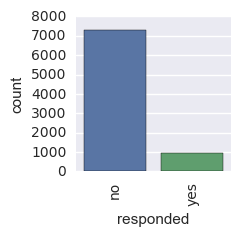

In [95]:
for col in cat_feat:
    plt.figure(figsize=(2,2))
    ax = sns.countplot(x=col, data=traindf)
    plt.xticks(rotation='vertical')
    plt.xlabel(col)
    plt.show()
    plt.close()


### 3. Data Preparation:
#### 3.1. Imputation for Missing Values
From previous analysis we learn that there are four columns have missing values. However, the 'profit' column is not caused by missing values since those 7310 people don't respond yes don't have profit for sure.
So we only need to deal with the rest three features's missing value problem.


In [97]:
mis_feat = ['custAge', 'schooling', 'day_of_week']
labels = []
values = []
for col in mis_feat:
    labels.append(col)
    values.append(traindf[col].isnull().sum())
    print(col, values[-1])

('custAge', 2014)
('schooling', 2406)
('day_of_week', 787)


Notice that 'schooling' and 'day_of_week' are both categorical responses, we can create a different response for the missing values for these columns. In that case, we only need to do the imputation of missing values for 'custAge' feature.
The first and simplest thought is replace these missing values by the mean or median age. We can compare this method's performance with the raw data later.

We create another two data frames to test different imputation methods.

In [151]:
traindf1 = deepcopy(traindf)
testdf1 = deepcopy(testdf)
print 'mean age of training set',np.nanmean(traindf1.custAge.values)
traindf1.custAge = traindf1.custAge.fillna(np.nanmean(traindf1.custAge.values))
traindf1.profit = traindf1.profit.fillna(0)

print 'mean age of test set',np.nanmean(testdf1.custAge.values)
testdf1.custAge = testdf1.custAge.fillna(np.nanmean(testdf1.custAge.values))

mean age of training set 39.9537275064
mean age of test set 40.0358519351


Use median as another replacement method:

In [160]:
traindf2 = deepcopy(traindf)
testdf2 = deepcopy(testdf)
print 'median age of training set',np.nanmedian(traindf2.custAge.values)
traindf2.custAge = traindf2.custAge.fillna(np.nanmedian(traindf2.custAge.values))
traindf2.profit = traindf2.profit.fillna(0)

print 'median age of test set',np.nanmedian(testdf2.custAge.values)
testdf2.custAge = testdf2.custAge.fillna(np.nanmean(testdf2.custAge.values))

median age of training set 38.0
median age of test set 38.0


#### 3.2.  Preprocessing categorical data:

In [153]:
print traindf1.shape
traindf1.head(3)

(8238, 24)


,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,49.000000,self-employed,married,basic.9y,no,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,999.0,0,no,0.0,1
1,39.953728,housemaid,married,professional.course,no,no,no,cellular,jul,tue,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,0.0,2
2,45.000000,management,divorced,university.degree,no,no,no,cellular,apr,tue,2,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,999.0,0,no,0.0,3


Remove responded variable from input categorical features:

In [154]:
print(cat_feat)
cat_feat_input = cat_feat[:-1]

['profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'responded']

Create dummy variables for those categorical reponses in both training and test datasets( dummy_na =True can take na into consideration )

In [156]:
traindf1 = pd.get_dummies(traindf1,dummy_na=True,columns=cat_feat_input)

In [359]:
testdf1 = pd.get_dummies(testdf1,dummy_na=True,columns=cat_feat_input)

Create a new combined response to indicate whether we should market this record, when the responded variable is 'yes' and the profit is more than 30.

In [175]:
y_list = [1 if traindf1.iloc[i]['responded']=='yes' and traindf1.iloc[i]['profit']>30 else 0 for i in traindf1.index]
traindf1['y'] = pd.Series(y_list,index = traindf1.index)

In [180]:
random.seed(1)

Considering the specific meaning of features, we need to remove some variables to make the input:

In [250]:
len(traindf1.columns)
all_feat = traindf1.columns.tolist()
all_feat.remove('y')
all_feat.remove('responded')
all_feat.remove('profit')
#remove id as well, since it has no specific meaning but would have some negative impact on the process of classificaiton:
all_feat.remove('id')
len(all_feat)

74

### 4. Modeling
Then we create random forest classification model to fit training data:


In [335]:
clf = RandomForestClassifier(n_estimators=50,criterion="entropy")
clf = clf.fit(traindf1[all_feat],traindf1['y'])
print clf.score(traindf1[all_feat],traindf1['y'])
pred_y = clf.predict(traindf1[all_feat])


0.998543335761


In [336]:
print 'True Positive:',len(traindf1[(traindf1.y.values == 1)&(traindf1.y.values==pred_y)])/float(len(traindf1.y))
print 'False Positive:',len(traindf1[(traindf1.y.values == 0)&(traindf1.y.values!=pred_y)])/float(len(traindf1.y))
print 'False Negative:',len(traindf1[(traindf1.y.values == 1)&(traindf1.y.values!=pred_y)])/float(len(traindf1.y))
print 'True Negative:',len(traindf1[(traindf1.y.values == 0)&(traindf1.y.values==pred_y)])/float(len(traindf1.y))

True Positive: 0.0971109492595
False Positive: 0.000242777373149
False Negative: 0.00121388686574
True Negative: 0.901432386502


Let's see the top 10 important features during the random forest classification and their corresponding importances:

In [337]:
importances = clf.feature_importances_.tolist()
sorted(zip(importances,all_feat),reverse=True)[:10]

[(0.11388040186807896, 'euribor3m'),
 (0.09764951851328803, 'custAge'),
 (0.05835773728209414, 'campaign'),
 (0.05043259407425556, 'nr.employed'),
 (0.04923392676808616, 'emp.var.rate'),
 (0.02847324943405215, 'pdays'),
 (0.027048033174186425, 'cons.conf.idx'),
 (0.026152024144217058, 'cons.price.idx'),
 (0.019525209157697905, 'housing_no'),
 (0.018525570563406403, 'housing_yes')]

### 5. Evaluation
Then we compute the objective function that we want to maximize. ( x1 indicates the count of true positive and x2 indicates false positive.)

In [338]:
x1, x2 = 0,0
profit = 0
temp_testdf = traindf1

for i in range(len(pred_y)):
    if pred_y[i] == True and temp_testdf.y.values[i] == True: 
        profit+= traindf1.ix[i,"profit"]
        x1+=1
    if pred_y[i] == True and temp_testdf.y.values[i] == False:
        x2+=1

print profit - 30*(x1+x2)

139286.0


In [ ]:
clf = RandomForestClassifier(n_estimators=50,criterion="entropy")
clf = clf.fit(traindf1[all_feat],traindf1['y'])
print clf.score(traindf1[all_feat],traindf1['y'])
pred_y = clf.predict(traindf1[all_feat])

In [301]:
len(all_feat)

74

Then we use 10 fold cross validation to evaluation the model:

First try, 10 tree:

In [350]:
kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
cv_scores = []
for train_idx, validation_idx in kfolding:
    
    train_X = traindf1.ix[train_idx,all_feat]
    test_X = traindf1.ix[validation_idx,all_feat]
    
    train_y = traindf1.ix[train_idx,'y']
    test_y = traindf1.ix[validation_idx,'y']
    
    clf = RandomForestClassifier(n_estimators=10).fit(train_X,train_y)
    pred_y = clf.predict(test_X)
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores.append(profit - 30*(x1+x2)) 
print np.mean(cv_scores)

2940.5


Add more trees to 50 for parameter tuning:

In [351]:
kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
cv_scores = []
for train_idx, validation_idx in kfolding:
    
    train_X = traindf1.ix[train_idx,all_feat]
    test_X = traindf1.ix[validation_idx,all_feat]
    
    train_y = traindf1.ix[train_idx,'y']
    test_y = traindf1.ix[validation_idx,'y']
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X,train_y)
    pred_y = clf.predict(test_X)
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores.append(profit - 30*(x1+x2)) 
print np.mean(cv_scores)

3598.5


Then try to use top 20 important features to do the classification (still 50 trees):


In [357]:
kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
cv_scores = []
for train_idx, validation_idx in kfolding:
    
    train_X = traindf1.ix[train_idx,all_feat]
    test_X = traindf1.ix[validation_idx,all_feat]
    
    train_y = traindf1.ix[train_idx,'y']
    test_y = traindf1.ix[validation_idx,'y']
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X,train_y)
    
    importances = clf.feature_importances_.tolist()
    important_features = [item[1] for item in sorted(zip(importances,all_feat),reverse=True)[:20]]
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X.ix[:,important_features],train_y)
    pred_y = clf.predict(test_X.ix[:,important_features])
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores.append(profit - 30*(x1+x2)) 
print np.mean(cv_scores)

3641.2


After finishing the current model, we can also use logistic regression to make classification:

In [374]:
kfolding = KFold(n = len(traindf1),n_folds = 10, shuffle =True)
cv_scores_rf = []
cv_scores_lr = []
for train_idx, validation_idx in kfolding:
    
    train_X = traindf1.ix[train_idx,all_feat]
    test_X = traindf1.ix[validation_idx,all_feat]
    
    train_y = traindf1.ix[train_idx,'y']
    test_y = traindf1.ix[validation_idx,'y']
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X,train_y)
    
    importances = clf.feature_importances_.tolist()
    important_features = [item[1] for item in sorted(zip(importances,all_feat),reverse=True)[:20]]
    
    clf = RandomForestClassifier(n_estimators=50).fit(train_X.ix[:,important_features],train_y)
    pred_y = clf.predict(test_X.ix[:,important_features])
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores_rf.append(profit - 30*(x1+x2)) 
    
    
    lgr = LogisticRegression().fit(train_X.ix[:,important_features], train_y)
    pred_y = lgr.predict(test_X.ix[:,important_features])
    
    
    x1, x2 = 0,0
    profit = 0
    
    for i in range(len(pred_y)):
        if pred_y[i] == True and test_y.values[i] == True: 
            profit+= traindf1.ix[test_y.index[i],"profit"]
            x1+=1
        if pred_y[i] == True and test_y.values[i] == False:
            x2+=1

    cv_scores_lr.append(profit - 30*(x1+x2)) 
    
print np.mean(cv_scores_rf)
print np.mean(cv_scores_lr)


3597.6
2707.1


According to the results above, we can see random forest is outperform to logistic regression. But it may be caused by lack of parameter tuning. However, these two methods have their own advantages and disadvantages. We will talk about it later in the presentation



Make prediction for test data by using our current best model which is random forest (tree number is 50, features are top 20 important as follow)

In [375]:
important_features

['euribor3m',
 'custAge',
 'nr.employed',
 'campaign',
 'cons.conf.idx',
 'emp.var.rate',
 'pmonths',
 'cons.price.idx',
 'poutcome_success',
 'pdays',
 'housing_no',
 'housing_yes',
 'profession_admin.',
 'pastEmail',
 'marital_married',
 'schooling_nan',
 'schooling_university.degree',
 'day_of_week_mon',
 'marital_single',
 'day_of_week_fri']

In [366]:
clf = RandomForestClassifier(n_estimators=50,criterion="entropy")
clf = clf.fit(traindf1[important_features],traindf1['y'])

pred_y = clf.predict(testdf1[important_features])
print sum(pred_y)
print pred_y
print len(pred_y)
testdf.shape
testdf['y'] = pd.Series(pred_y,index = testdf.index)
testdf.shape

1649
[0 0 0 ..., 0 0 0]
32950


(32950, 23)

In [367]:
testdf.to_csv('testingCandidate_with_y.csv')

In [376]:
pd.read_csv('testingCandidate_with_y.csv').shape

(32950, 24)

In [377]:
pd.read_csv('testingCandidate.csv').shape

(32950, 22)